In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
missing_values = df.isnull().sum()
print("Number of empty cells in each column:")
print(missing_values)

Number of empty cells in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [142]:
df = df[df['Embarked'].notna()]
mean_age = np.round(df['Age'].mean(), 2)
df['Age'].fillna(mean_age, inplace=True)
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
print(df['Has_Cabin'].value_counts())
df['Deck'] = df['Cabin'].str[0].fillna('U')
print(df['Deck'].value_counts())
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df['Title'].value_counts())

Has_Cabin
0    687
1    202
Name: count, dtype: int64
Deck
U    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
Title
Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


C:\Users\hites\AppData\Local\Temp\ipykernel_29464\2930924993.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


In [143]:
missing_values = df.isnull().sum()
print("Number of empty cells in each column:")
print(missing_values)
df.head(10)

Number of empty cells in each column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Has_Cabin      0
Deck           0
FamilySize     0
Title          0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Deck,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,S,0,U,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C,1,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,S,0,U,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,S,1,C,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,S,0,U,1,Mr
5,6,0,3,"Moran, Mr. James",male,29.64,0,0,8.4583,Q,0,U,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.8625,S,1,E,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,S,0,U,5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.1333,S,0,U,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,C,0,U,2,Mrs


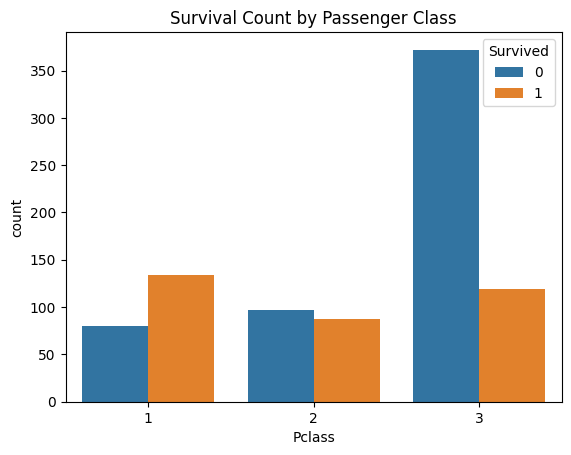

In [144]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

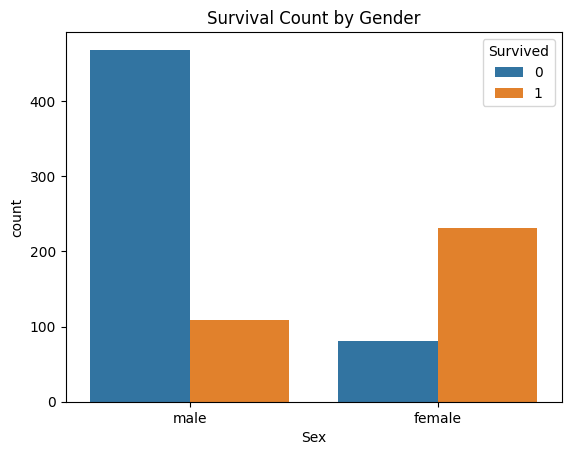

In [145]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

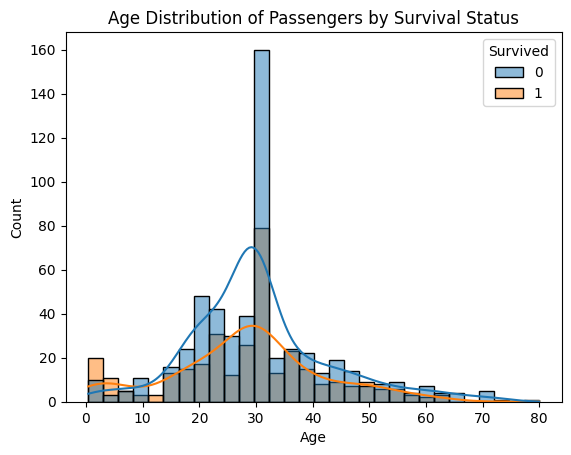

In [146]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution of Passengers by Survival Status')
plt.show()

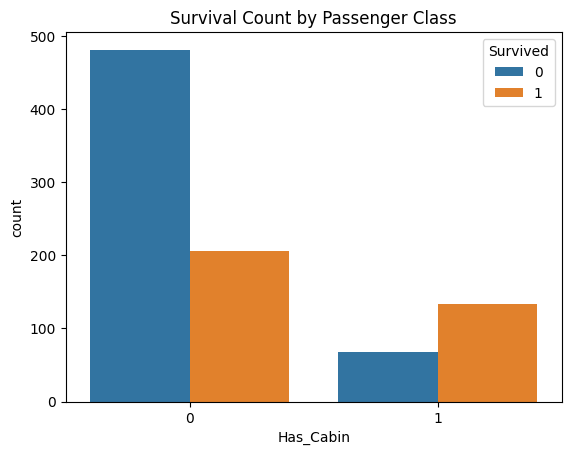

In [147]:
sns.countplot(data=df, x='Has_Cabin', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

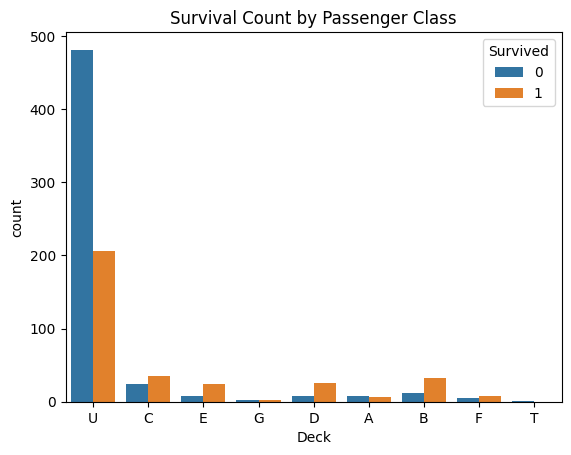

In [148]:
sns.countplot(data=df, x='Deck', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

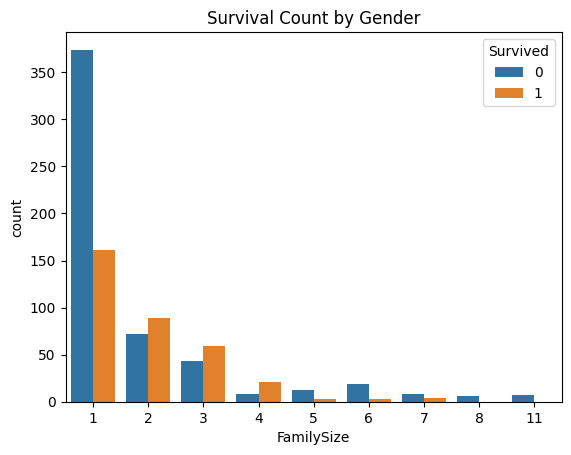

In [149]:
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

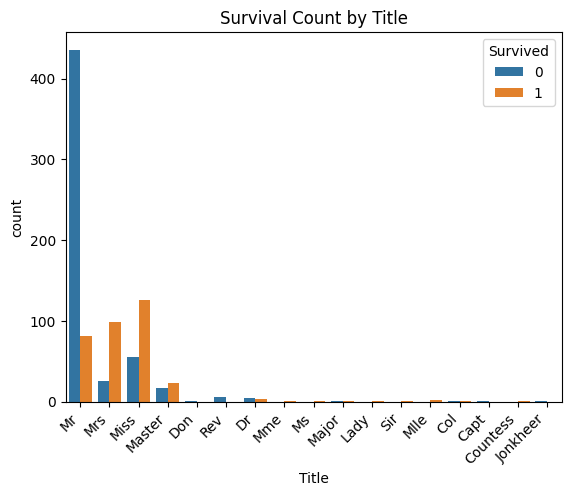

In [150]:
sns.countplot(data=df, x='Title', hue='Survived')
plt.title('Survival Count by Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [151]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Deck,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,0,U,2,Mr


In [152]:
categorical_features = ['Sex', 'Embarked', 'Title' , 'Deck']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\nColumns after encoding:", df_encoded.columns)
print("\nFirst 2 rows after encoding:\n", df_encoded.head())


Columns after encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Fare', 'Has_Cabin', 'FamilySize', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Col', 'Title_Countess', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U'],
      dtype='object')

First 2 rows after encoding:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  3

In [153]:
df_encoded.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,...,Title_Rev,Title_Sir,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.25,0,2,...,False,False,False,False,False,False,False,False,False,True


In [154]:
features = df_encoded.columns.tolist()
features.remove('Survived')
features.remove('Name')
features.remove('PassengerId')
X = df_encoded[features] 
y = df_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (711, 34)
Shape of X_test: (178, 34)
Shape of y_train: (711,)
Shape of y_test: (178,)


In [155]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("--- Scaled Training Data ---")
print(X_train_scaled.head())

print("\n--- Scaled Test Data ---")
print(X_test_scaled.head())

--- Scaled Training Data ---
     Pclass       Age     SibSp     Parch      Fare  Has_Cabin  FamilySize  \
0 -1.601461  0.944470  0.469761 -0.461495  0.419754   1.925775    0.073018   
1 -0.391431 -0.006671 -0.468441 -0.461495 -0.646083  -0.519271   -0.552472   
2 -1.601461 -0.006671 -0.468441 -0.461495  3.851758   1.925775   -0.552472   
3 -1.601461 -1.210219  0.469761  1.942337  1.787603   1.925775    1.323997   
4  0.818600  0.097985 -0.468441 -0.461495 -0.469980  -0.519271   -0.552472   

   Sex_male  Embarked_Q  Embarked_S  ...  Title_Rev  Title_Sir    Deck_B  \
0  0.743237   -0.300817    0.601722  ...  -0.084156        0.0 -0.244157   
1  0.743237   -0.300817    0.601722  ...  -0.084156        0.0 -0.244157   
2  0.743237   -0.300817    0.601722  ...  -0.084156        0.0 -0.244157   
3 -1.345465   -0.300817    0.601722  ...  -0.084156        0.0  4.095729   
4 -1.345465   -0.300817    0.601722  ...  -0.084156        0.0 -0.244157   

     Deck_C    Deck_D    Deck_E    Deck_F    

In [156]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

Logistic Regression Accuracy: 0.8427


In [157]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.7921


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Initialize the model
gb_clf = GradientBoostingClassifier(random_state=42)

# 2. Train the model
gb_clf.fit(X_train_scaled, y_train)

# 3. Make predictions
y_pred_gb = gb_clf.predict(X_test_scaled)

# 4. Evaluate the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

Gradient Boosting Accuracy: 0.8258


In [ ]:
# Define base models
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    voting='soft'
)

# Define hyperparameter grid
param_grid = {
    'rf__n_estimators': [500,700],
    'rf__max_depth': [100,200],
    'xgb__n_estimators': [500,700],
    'xgb__max_depth': [5],
    'xgb__learning_rate': [0.1]
}

# Grid Search CV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predictions
y_pred1 = best_model.predict(X_test)

# Evaluation

accuracy = accuracy_score(y_test, y_pred1)
print(f"Model accuracy : {accuracy : .4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\hites\Titanic\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:18:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'rf__max_depth': 100, 'rf__n_estimators': 700, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 700}
Model accuracy :  0.6180


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# --- FIX 1: Add RandomForestClassifier to your list of models ---
log_reg = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
rf_clf = RandomForestClassifier(random_state=42) # Define the missing model

# Add 'rf' to your estimators list
voting_clf = VotingClassifier(
    estimators=[('log_reg', log_reg), ('xgb', xgb), ('rf', rf_clf)],
    voting='soft'
)

# Your hyperparameter grid is now correct for the updated voter
param_grid = {
    'rf__n_estimators': [500, 700],
    'rf__max_depth': [100, 200],
    'xgb__n_estimators': [500, 700],
    'xgb__max_depth': [5],
    'xgb__learning_rate': [0.1]
    # Note: You can also add parameters for 'log_reg' here, like 'log_reg__C': [0.1, 1]
}

# Grid Search CV
grid = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

# Best model
best_model = grid.best_estimator_
print("\nBest Parameters:", grid.best_params_)

# --- FIX 2: Use the scaled test data for prediction ---
y_pred1 = best_model.predict(X_test_scaled) # Use X_test_scaled here

# Evaluation
accuracy = accuracy_score(y_test, y_pred1)
print(f"Model accuracy: {accuracy:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\hites\Titanic\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:25:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'rf__max_depth': 100, 'rf__n_estimators': 500, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 700}
Model accuracy: 0.8371
